In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import nltk
import sklearn


from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [10]:
dataset = pd.read_csv('C:/Users/keita/OneDrive/Documenti/universita/data_processing/train.csv')
test_set = pd.read_csv("C:/Users/keita/OneDrive/Documenti/universita/data_processing/test.csv")

In [11]:
dataset.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [12]:
target_category = dataset['Class Index'].unique()
print(target_category)

[3 4 2 1]


In [13]:
dataset['categoryId'] = dataset['Class Index'].factorize()[0]
dataset.head()

,Class Index,Title,Description,categoryId
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",0
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,0
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,0
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,0
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",0


In [14]:
target_category = dataset['categoryId'].unique()
print(target_category)

[0 1 2 3]


In [15]:
category = dataset[["Class Index","categoryId"]].drop_duplicates().sort_values('categoryId')
category

,Class Index,categoryId
0,3,0
78,4,1
448,2,2
492,1,3


In [16]:
dataset.groupby('Class Index').categoryId.count()

Class Index
1    30000
2    30000
3    30000
4    30000
Name: categoryId, dtype: int64

<AxesSubplot:xlabel='Class Index'>

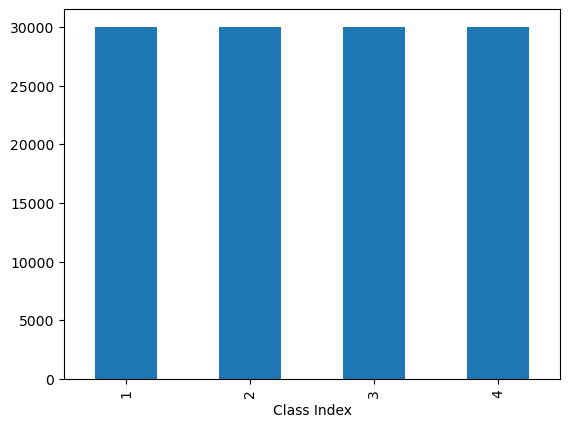

In [17]:
dataset.groupby('Class Index').categoryId.count().plot.bar(ylim=0)

In [18]:
def preprocessDataset(train_text):
       
    #word tokenization using text-to-word-sequence
    train_text= str(train_text)
    tokenized_train_set = text_to_word_sequence(train_text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
        
    #stop word removal
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]
        
     
    #join words into sentence
    stopwordremove_text = ' '.join(stopwordremove)
        
        
    #remove numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())
       
        
    #--Stemming--
    stemmer= PorterStemmer()

    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
        
        
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
        
    return lem_text

In [19]:
dataset['Text'] = dataset['Description'].apply(preprocessDataset)
text = dataset['Text']
category = dataset['Class Index']
text.head()


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\keita/nltk_data'
    - 'C:\\Users\\keita\\anaconda3\\nltk_data'
    - 'C:\\Users\\keita\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\keita\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\keita\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keita\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
# Carica il tokenizzatore preaddestrato di RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Applica il tokenizzatore a ogni elemento della colonna 'Sentence'
dataset['Text'] = dataset['Description'].apply(lambda x: tokenizer.tokenize(x))

# Visualizza le prime righe per vedere il risultato
dataset['Text'].head()

In [46]:
# Supponiamo che il DataFrame sia chiamato 'data_ml' e la colonna con i token sia 'clear_text'

# Converte la lista di token in una stringa unica per ogni riga
dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join(x))

# Visualizza le prime righe per vedere il risultato
dataset['Text'].head()


0    Reuters Ġ- ĠShort - sell ers , ĠWall ĠStreet '...
1    Reuters Ġ- ĠPrivate Ġinvestment Ġfirm ĠCarly l...
2    Reuters Ġ- ĠSo aring Ġcrude Ġprices Ġplus Ġwor...
3    Reuters Ġ- ĠAuthorities Ġhave Ġhalted Ġoil Ġex...
4    AFP Ġ- ĠT ear away Ġworld Ġoil Ġprices , Ġtopp...
Name: Text, dtype: object

In [47]:
text = dataset['Text']
category = dataset['Class Index']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

print(len(X_train))
print(len(X_test))

84000
36000


In [49]:
X_train

90328     SH AR ES Ġin ĠManchester ĠUnited Ġwill Ġcome Ġ...
63481     SH ANG HA I , ĠChina Ġ- ĠMic ron ĠTechnology Ġ...
109822    Super hero Ġmovie ĠThe ĠInc red ibles Ġtops Ġt...
40908     L ONDON Ġ( AFP ) Ġ-- ĠBritish Ġairline Ġmagn a...
27815     B oots Ġis Ġto Ġshut Ġdown Ġits Ġloss making Ġ...
                                ...                        
115750    ( Wi PC / IF EX ) Ġ- ĠOn Ġthe Ġafternoon Ġof Ġ...
11964     ĠNEW ĠYORK Ġ( Reuters ) Ġ- ĠU . S . Ġconsumer ...
93317     When ĠFerdinand ĠAl var o ĠJr . Ġwanted Ġto Ġs...
46541     In Ġits Ġpursuit Ġof Ġone - stop Ġstorage Ġsho...
63864     ĠJ OH ANN ES BUR G Ġ( Reuters ) Ġ- ĠSouth ĠAfr...
Name: Text, Length: 84000, dtype: object

In [52]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, Y_test, target_names=target_category))


Naive Bayes Train Accuracy Score : 91% 
Naive Bayes Test Accuracy Score  : 89% 

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      8850
           1       0.98      0.94      0.96      9366
           2       0.85      0.86      0.85      8834
           3       0.86      0.86      0.86      8950

    accuracy                           0.89     36000
   macro avg       0.89      0.89      0.89     36000
weighted avg       0.89      0.89      0.89     36000



# WHITE SPACES

In [61]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

# Definisci un trasformatore personalizzato
class ListToStringTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        # Converte una lista di token in una stringa
        return [' '.join(x) for x in X]

    def fit(self, X, y=None, **fit_params):
        return self

# Crea una pipeline che utilizza il trasformatore
pipeline = Pipeline([
    ('list_to_string', ListToStringTransformer())
])

# Supponiamo che la colonna 'TextW' contenga liste di token
dataset['Textw'] = pipeline.fit_transform(dataset['TextW'])

# Visualizza le prime righe per vedere il risultato
dataset['Textw'].head()


0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: Textw, dtype: object

In [62]:
text = dataset['Textw']
category = dataset['Class Index']

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

print(len(X_train))
print(len(X_test))

84000
36000


In [64]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, Y_test, target_names=target_category))


Naive Bayes Train Accuracy Score : 91% 
Naive Bayes Test Accuracy Score  : 90% 

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      8881
           1       0.98      0.95      0.96      9284
           2       0.85      0.86      0.86      8912
           3       0.86      0.87      0.87      8923

    accuracy                           0.90     36000
   macro avg       0.90      0.90      0.90     36000
weighted avg       0.90      0.90      0.90     36000



# DECISION TREE

In [60]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(X_train, Y_train)

test_predict = dt.predict(X_test)

train_accuracy = round(dt.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Decision Tree Train Accuracy Score : 100% 
Decision Tree Test Accuracy Score  : 74% 

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      8940
           1       0.83      0.81      0.82      9168
           2       0.69      0.70      0.70      8888
           3       0.71      0.71      0.71      9004

    accuracy                           0.74     36000
   macro avg       0.74      0.74      0.74     36000
weighted avg       0.74      0.74      0.74     36000



In [66]:
text = dataset['Text']
category = dataset['Class Index']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

print(len(X_train))
print(len(X_test))

84000
36000


# RANDOM FOREST

In [68]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(X_train, Y_train)

test_predict = rfc.predict(X_test)

train_accuracy = round(rfc.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

K-Nearest Neighbour Train Accuracy Score : 100% 
K-Nearest Neighbour Test Accuracy Score  : 86% 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      8661
           1       0.96      0.89      0.92      9682
           2       0.81      0.86      0.83      8462
           3       0.84      0.82      0.83      9195

    accuracy                           0.86     36000
   macro avg       0.86      0.86      0.86     36000
weighted avg       0.87      0.86      0.86     36000

